# Song lyrics exploration - Part 3: Word clouds

Word clouds are a fun and oftentimes helpful technique for visualizing natural language data.
They can show words scaled by any metric, although term frequency (TF) and
term-frequency-inverse-document-frequency
([TF-IDF](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting))
are the most common metrics.
For a multi-class or multi-label classification problem,
word clouds can highlight the similarities and differences between separate classes by treating each class as its own document to compare with all others.
The word clouds seen here were made with the `WordCloud` generator by
[amueller](https://github.com/amueller/word_cloud),
with pre-processing done via `gensim` and `nltk`.

In the case of heavy metal genre classification, term frequency alone would not be very illuminating:
the genres visualized here share a lot of common themes.
TF-IDF does much better at picking out the words that are unique to a genre:
black metal lyrics deal with topics like the occult, religion, and nature;
death metal focuses on the obscene and horrifying;
heavy metal revolves around themes more familiar to rock and pop;
power metal adopts the vocabulary of fantasies and histories;
and thrash metal sings of violence and war.
The full corpus word cloud shows themes common to all heavy metal genres.

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer

plt.rcParams['font.size'] = 18

## Data

In [2]:
df = pd.read_csv('../bands-1pct.csv')
genre_cols = [c for c in df.columns if 'genre_' in c]
genres = [c.replace('genre_', '') for c in genre_cols]

## Functions for creating and visualizing word clouds

In [3]:
def tokenizer(s):
    t = RegexpTokenizer('[a-zA-Z]+')
    return [word.lower() for word in t.tokenize(s) if len(word) >= 4]


def get_wordclouds(corpus, names, min_df=0, max_df=1, width=800, height=500):
    vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'), tokenizer=tokenizer, min_df=min_df, max_df=max_df)
    X = vectorizer.fit_transform(corpus)
    vocabulary = vectorizer.get_feature_names()
    out = {}
    for i, name in names.items():
        print(name)
        freqs = X.toarray()[i,:]
        word_freqs = dict(zip(vocabulary, freqs))
        out[name] = WordCloud(width=width, height=height).fit_words(word_freqs)
    return out


def plot_wordclouds(clouds):
    names = list(clouds.keys())
    width = clouds[names[0]].width
    height = clouds[names[0]].height
    dpi = plt.rcParams['figure.dpi']
    nrows = int(np.ceil(len(names) / 2))
    ncols = 2
    figsize = (width / dpi * ncols, height / dpi * nrows)
    fig, subplots = plt.subplots(nrows, ncols, figsize=figsize, facecolor='k')
    for i in range(subplots.size):
        ax = subplots[i // 2, i % 2]
        ax.set_facecolor('k')
        ax.set_axis_off()
        if i < len(names):
            name = names[i]
            ax.imshow(clouds[name])
            ax.set_title(name, color='w', fontweight='bold', y=1.05)
    plt.show()

## Word clouds for genres

Here we split the full dataframe by genre, so each document consists of all the lyrics for that genre.

In [4]:
genre_corpus = []
for genre, col in zip(genres, genre_cols):
    other_cols = [c for c in genre_cols if c != col]
    words = df[(df[col] == 1) & (df[other_cols] == 0).all(axis=1)].words
    genre_corpus.append(' '.join(words))

In [5]:
genre_clouds = get_wordclouds(genre_corpus, dict(enumerate(genres)), min_df=0.5, max_df=0.8)

black
death
deathcore
doom
folk
gothic
grindcore
heavy
metalcore
power
progressive
symphonic
thrash


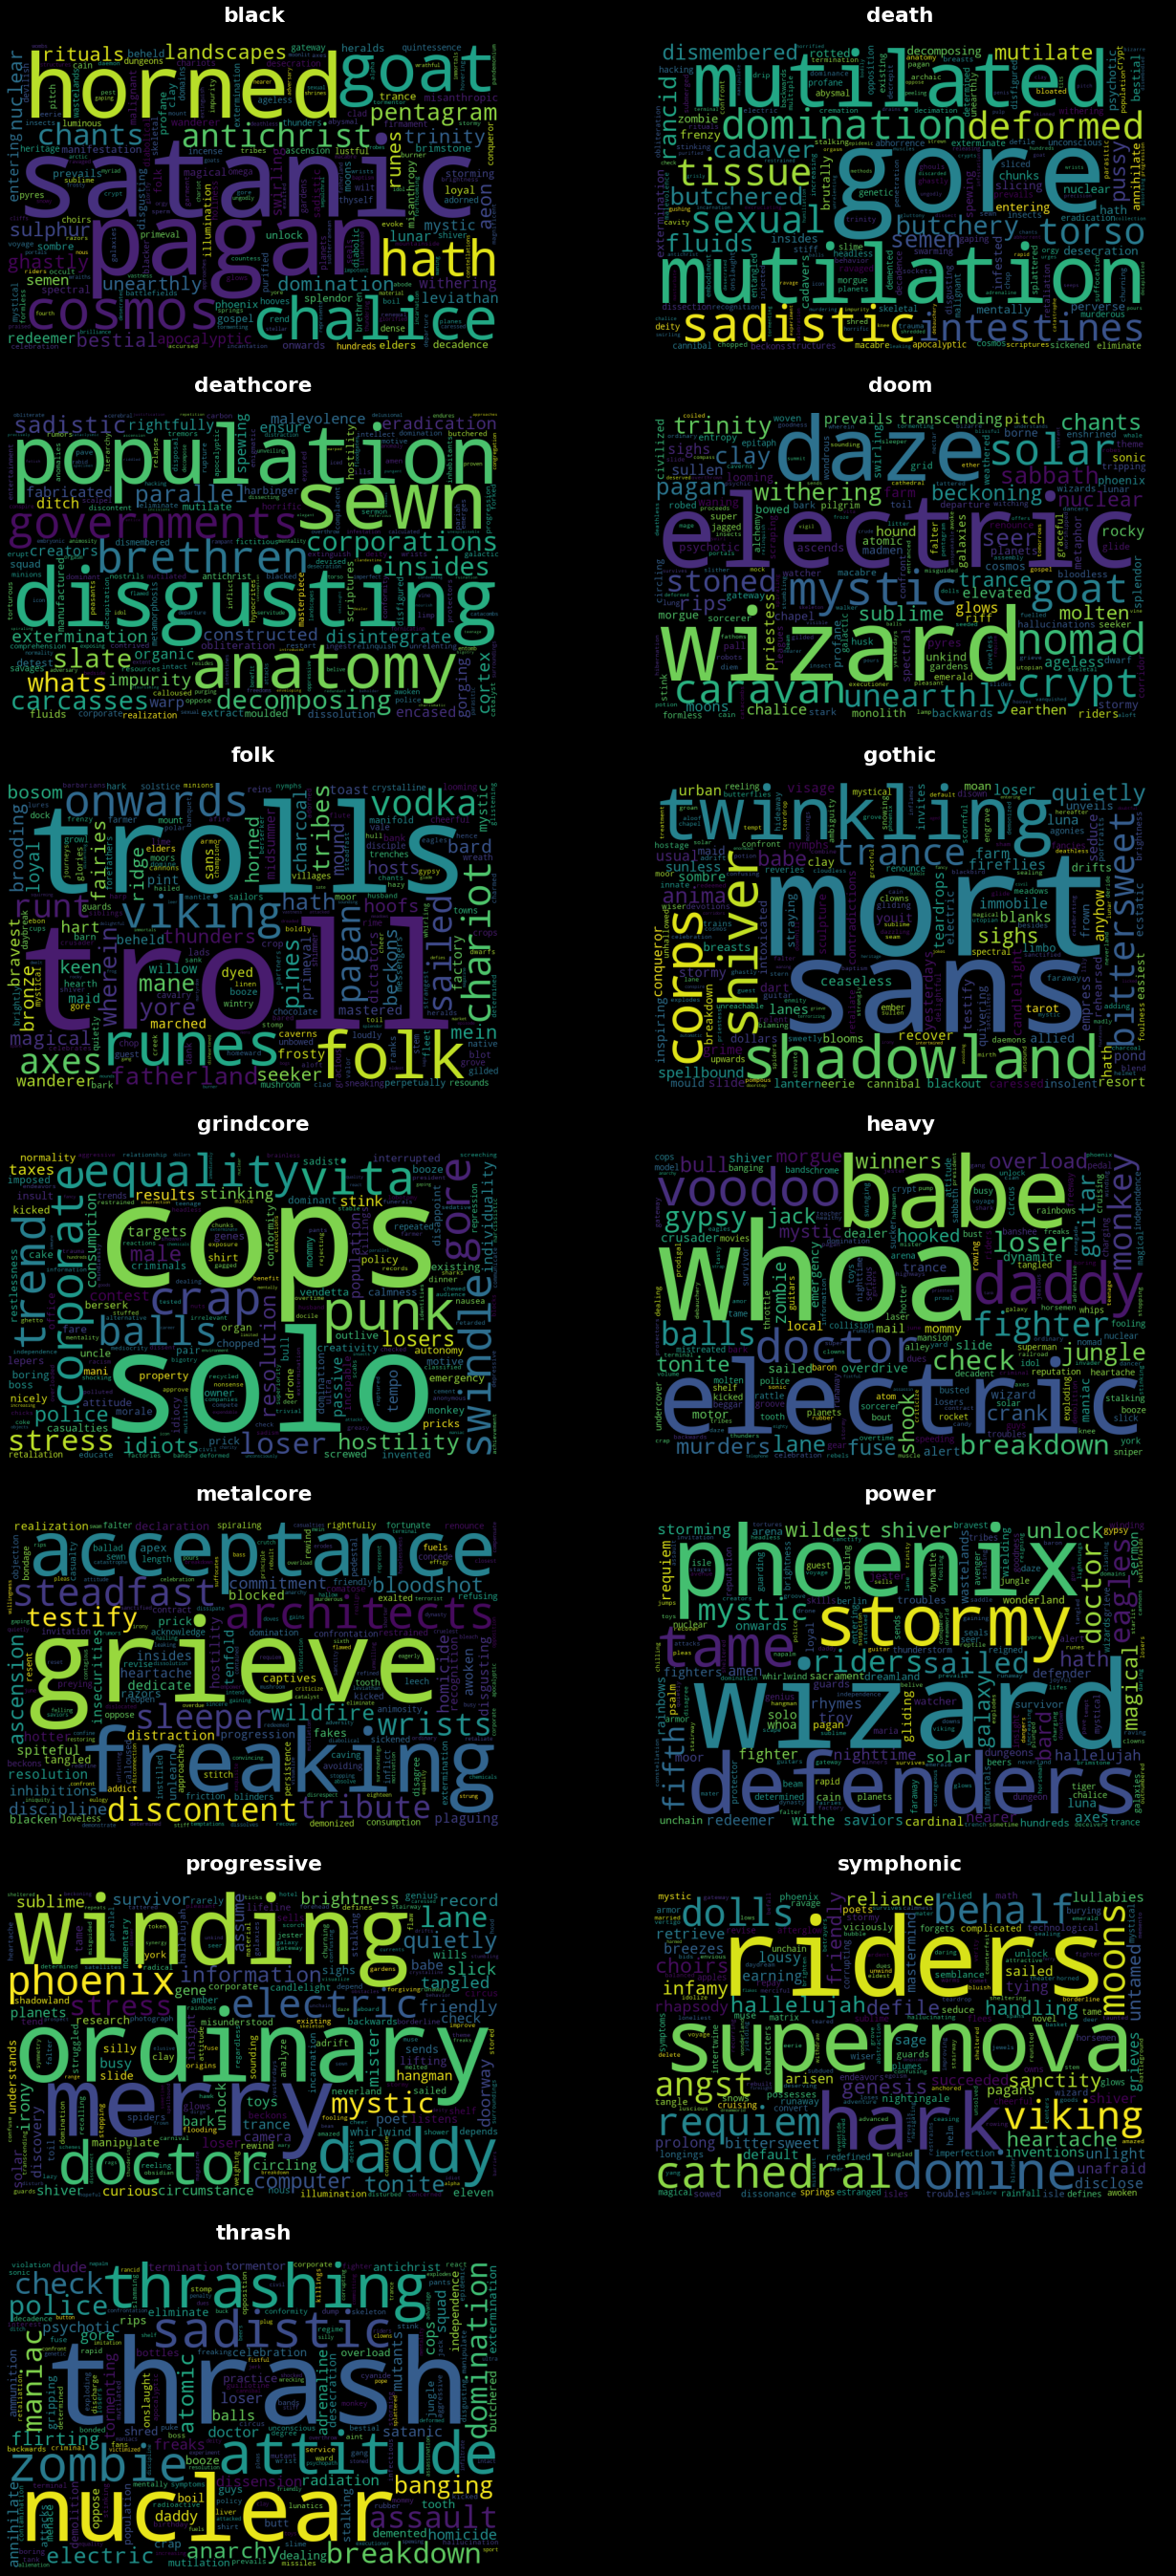

In [6]:
plot_wordclouds(genre_clouds)

## Word clouds for bands

We can likewise build word clouds for individual bands.
Here are word clouds for the top-ten bands by number of album reviews.

In [7]:
band_corpus = list(df.words)
bands = df.sort_values('reviews', ascending=False)['name'].values[:10]
print(bands)
bands_dict = {i: name for i, name in df.name.items() if name in bands}

['Iron Maiden' 'Megadeth' 'Black Sabbath' 'Judas Priest' 'Metallica'
 'Darkthrone' 'Slayer' 'Opeth' 'Cannibal Corpse' 'Overkill']


In [8]:
band_clouds = get_wordclouds(band_corpus, bands_dict, min_df=0.1, max_df=0.5)

Iron Maiden
Opeth
Slayer
Judas Priest
Black Sabbath
Metallica
Megadeth
Darkthrone
Overkill
Cannibal Corpse


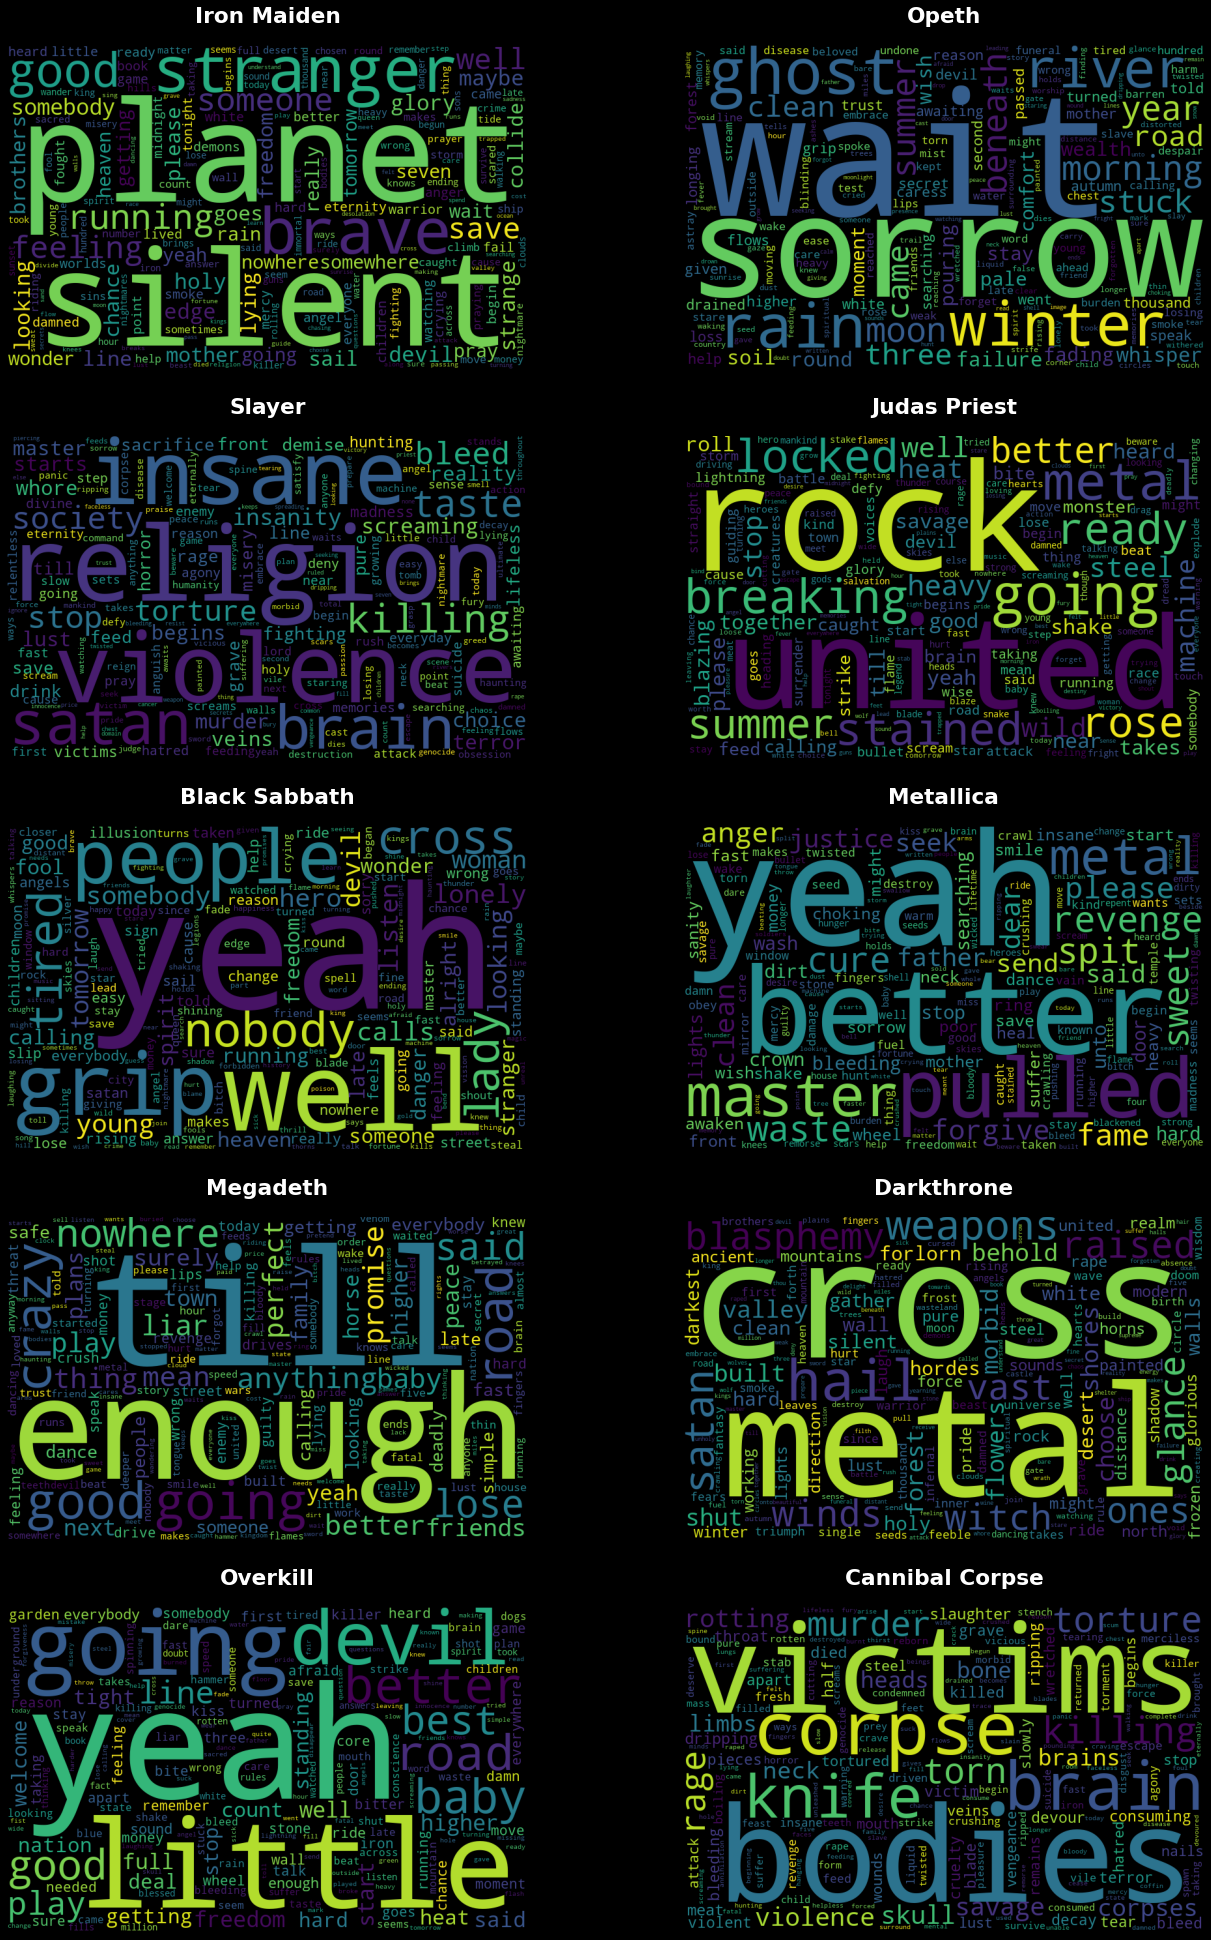

In [9]:
plot_wordclouds(band_clouds)